In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [20]:
train = ImageDataGenerator(rescale = 1/255)

In [21]:
#specifiying the training and validation dataset path
train_dataset = train.flow_from_directory('D:/Projects/SPD/Datas/training/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('D:/Projects/SPD/Datas/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 70 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'Not Nude': 0, 'Nude': 1}

In [23]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [24]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
#three layered Neural Network 
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    #tf.keras.layers.Conv2D(128,(3,3), activation = 'relu',),
                                    #tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(), 
                                    ##
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    ##
                                    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
    
])

In [26]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [27]:
#training the model with low epochs
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
5/5 [==============================] - 2s 322ms/step - loss: 5.5732 - accuracy: 0.4667 - val_loss: 0.4537 - val_accuracy: 0.9487
Epoch 2/10
5/5 [==============================] - 1s 290ms/step - loss: 0.8153 - accuracy: 0.4667 - val_loss: 0.4699 - val_accuracy: 0.8974
Epoch 3/10
5/5 [==============================] - 1s 273ms/step - loss: 0.5879 - accuracy: 0.6667 - val_loss: 0.6717 - val_accuracy: 0.5128
Epoch 4/10
5/5 [==============================] - 1s 264ms/step - loss: 0.9306 - accuracy: 0.4667 - val_loss: 0.5020 - val_accuracy: 0.9487
Epoch 5/10
5/5 [==============================] - 1s 276ms/step - loss: 0.4949 - accuracy: 0.8000 - val_loss: 0.3367 - val_accuracy: 0.9744
Epoch 6/10
5/5 [==============================] - 1s 262ms/step - loss: 0.3618 - accuracy: 0.8462 - val_loss: 0.8601 - val_accuracy: 0.5128
Epoch 7/10
5/5 [==============================] - 1s 278ms/step - loss: 0.7499 - accuracy: 0.6923 - val_loss: 0.3107 - val_accuracy: 1.0000
Epoch 8/10
5/5 [====

Image Taken!
Not Nude


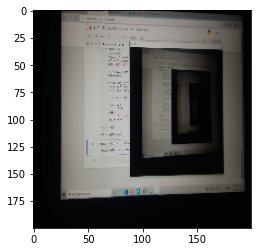

In [28]:
url = 'http://192.168.1.79:8080/video'
cam = cv2.VideoCapture(url)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    resized = cv2.resize(frame, (800, 600))
    if not ret:
        #print("failed to grab frame")
        break
    cv2.imshow("test", resized)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        #print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "frame.jpg".format(img_counter)
        cv2.imwrite(img_name, resized)
        print("Image Taken!")
        
        img = image.load_img('frame.jpg', target_size = (200,200))
        plt.imshow(img)

        x = image.img_to_array(img)
        x = np.expand_dims(x,axis = 0)
        images = np.vstack([x])

        value = model.predict(images)

        if value == 1:
            print("Nude")
        else:
            print("Not Nude")
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

In [18]:
#saving the model
model.save('D:/Projects/SPD/spd.xml')

INFO:tensorflow:Assets written to: D:/Projects/SPD/spd.xml\assets
